### Life Expectancy: 

The goal of this project is to develop a machine learning model to estimate life expectancy based on key socio-economic and health indicators.
    
Dataset: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

#### Import data

In [34]:
df = pd.read_csv("LifeExpectancyData.csv")

# Clean up column names - strip spaces from both ends 
df.columns = df.columns.str.strip()

#### Data exploration

In [35]:
# Check the dataset
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.00,263.00,62,0.01,71.28,65.00,1154,19.10,83,6.00,8.16,65.00,0.10,584.26,33736494.00,17.20,17.30,0.48,10.10
1,Afghanistan,2014,Developing,59.90,271.00,64,0.01,73.52,62.00,492,18.60,86,58.00,8.18,62.00,0.10,612.70,327582.00,17.50,17.50,0.48,10.00
2,Afghanistan,2013,Developing,59.90,268.00,66,0.01,73.22,64.00,430,18.10,89,62.00,8.13,64.00,0.10,631.74,31731688.00,17.70,17.70,0.47,9.90
3,Afghanistan,2012,Developing,59.50,272.00,69,0.01,78.18,67.00,2787,17.60,93,67.00,8.52,67.00,0.10,669.96,3696958.00,17.90,18.00,0.46,9.80
4,Afghanistan,2011,Developing,59.20,275.00,71,0.01,7.10,68.00,3013,17.20,97,68.00,7.87,68.00,0.10,63.54,2978599.00,18.20,18.20,0.45,9.50


In [6]:
# Check the statistics of the variables
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.00,2928.00,2928.00,2938.00,2744.00,2938.00,2385.00,2938.00,2904.00,2938.00,2919.00,2712.00,2919.00,2938.00,2490.00,2286.00,2904.00,2904.00,2771.00,2775.00
mean,2007.52,69.22,164.80,30.30,4.60,738.25,80.94,2419.59,38.32,42.04,82.55,5.94,82.32,1.74,7483.16,12753375.12,4.84,4.87,0.63,11.99
std,4.61,9.52,124.29,117.93,4.05,1987.91,25.07,11467.27,20.04,160.45,23.43,2.50,23.72,5.08,14270.17,61012096.51,4.42,4.51,0.21,3.36
min,2000.00,36.30,1.00,0.00,0.01,0.00,1.00,0.00,1.00,0.00,3.00,0.37,2.00,0.10,1.68,34.00,0.10,0.10,0.00,0.00
25%,2004.00,63.10,74.00,0.00,0.88,4.69,77.00,0.00,19.30,0.00,78.00,4.26,78.00,0.10,463.94,195793.25,1.60,1.50,0.49,10.10
50%,2008.00,72.10,144.00,3.00,3.75,64.91,92.00,17.00,43.50,4.00,93.00,5.75,93.00,0.10,1766.95,1386542.00,3.30,3.30,0.68,12.30
75%,2012.00,75.70,228.00,22.00,7.70,441.53,97.00,360.25,56.20,28.00,97.00,7.49,97.00,0.80,5910.81,7420359.00,7.20,7.20,0.78,14.30
max,2015.00,89.00,723.00,1800.00,17.87,19479.91,99.00,212183.00,87.30,2500.00,99.00,17.60,99.00,50.60,119172.74,1293859294.00,27.70,28.60,0.95,20.70


In [36]:
# Check the total missing values in each column
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

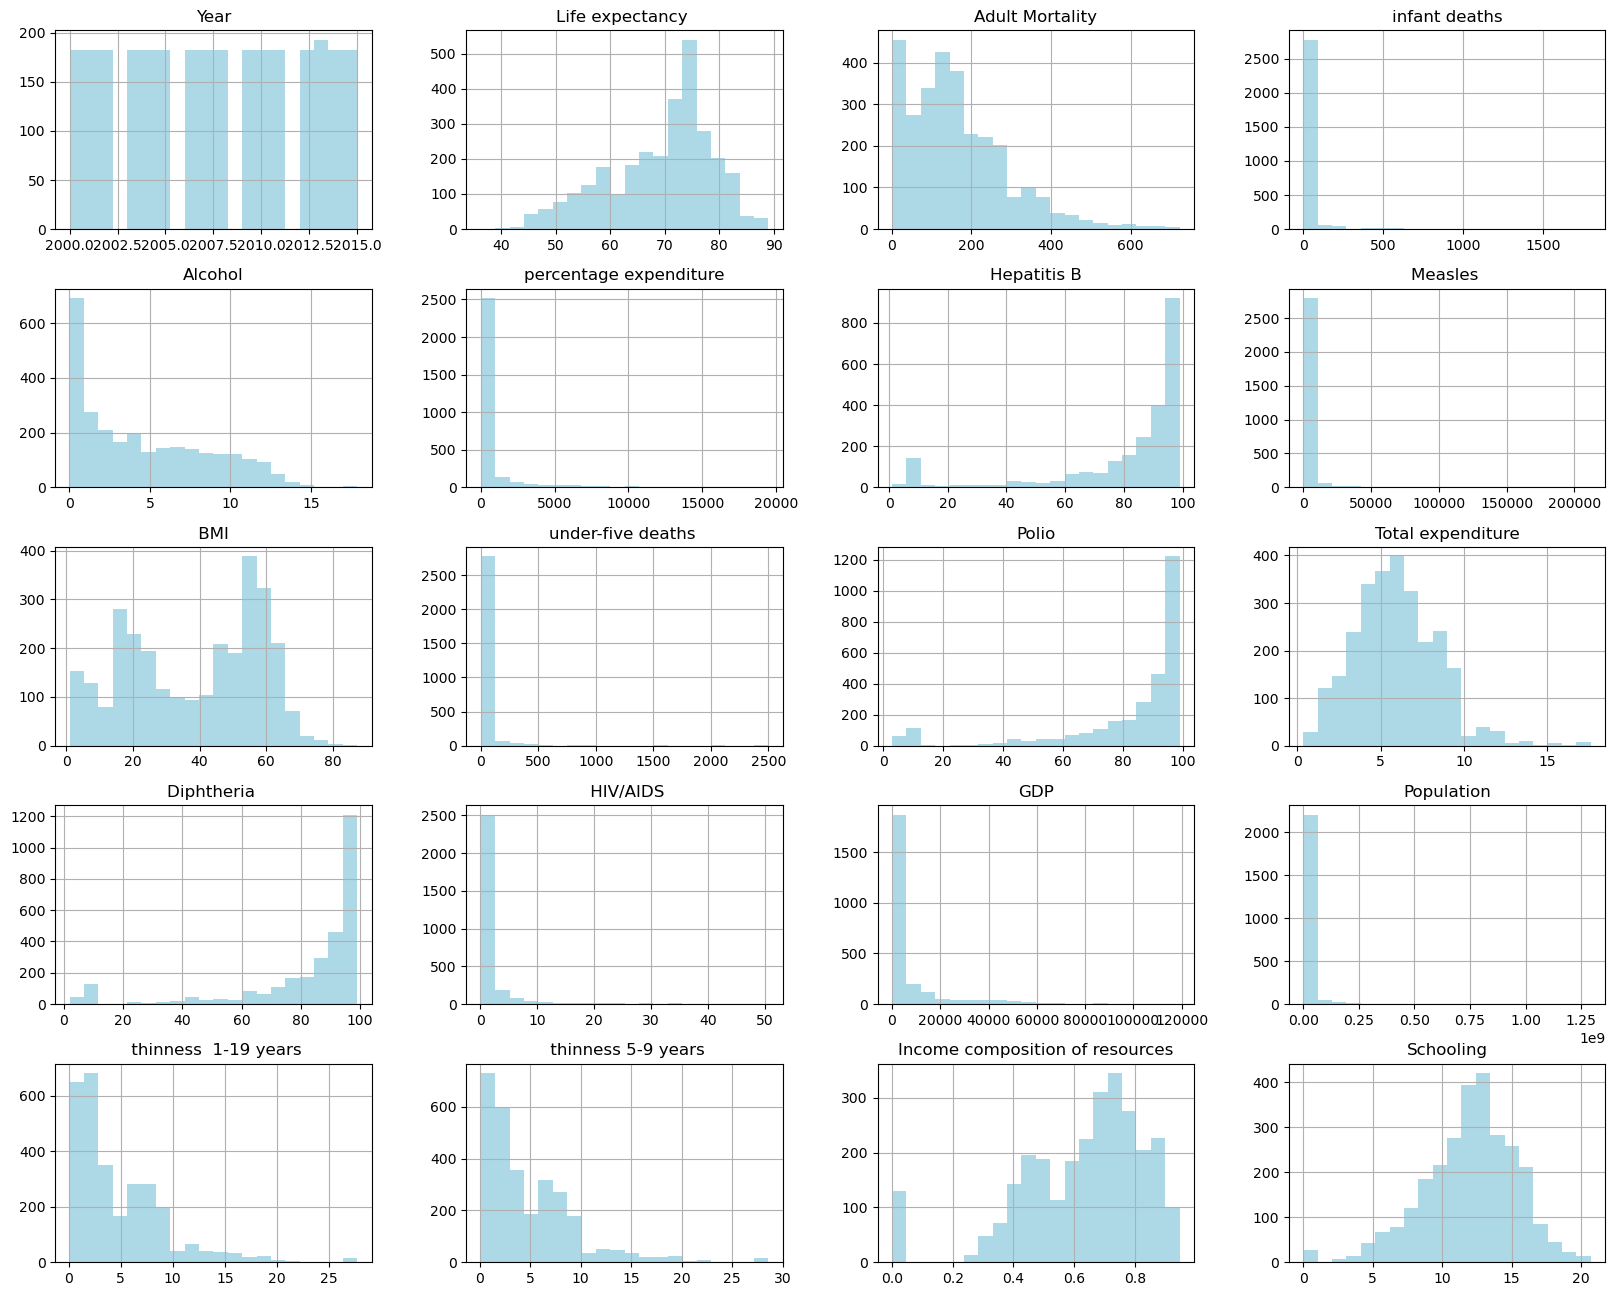

In [7]:
# Use histograms of each variable to visualise the distribution of each attribute.
df.hist(bins=20,figsize=(20, 16), color = 'lightblue')
plt.show()


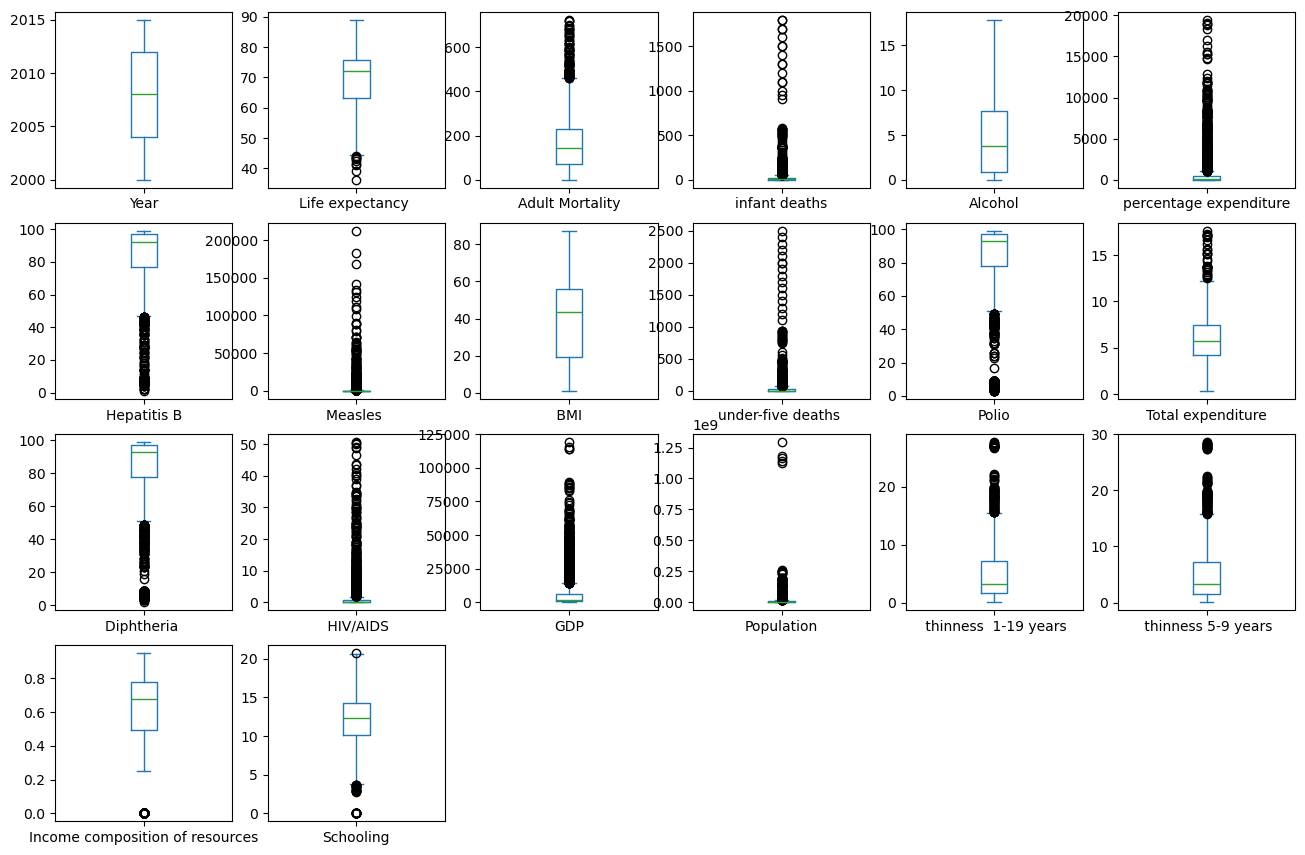

In [8]:
# Use box plots of each variable to visualise the distribution of each attribute.
df.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey= False, figsize=(16,16))
plt.show()


##### Check the correlation between varibles

In [26]:
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix.round(2) 


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.00,0.17,-0.08,-0.04,-0.05,0.03,0.10,-0.08,0.11,-0.04,0.09,0.09,0.13,-0.14,0.10,0.02,-0.05,-0.05,0.24,0.21
Life expectancy,0.17,1.00,-0.70,-0.20,0.40,0.38,0.26,-0.16,0.57,-0.22,0.47,0.22,0.48,-0.56,0.46,-0.02,-0.48,-0.47,0.72,0.75
Adult Mortality,-0.08,-0.70,1.00,0.08,-0.20,-0.24,-0.16,0.03,-0.39,0.09,-0.27,-0.12,-0.28,0.52,-0.30,-0.01,0.30,0.31,-0.46,-0.45
infant deaths,-0.04,-0.20,0.08,1.00,-0.12,-0.09,-0.22,0.50,-0.23,1.00,-0.17,-0.13,-0.18,0.03,-0.11,0.56,0.47,0.47,-0.15,-0.19
Alcohol,-0.05,0.40,-0.20,-0.12,1.00,0.34,0.09,-0.05,0.33,-0.11,0.22,0.30,0.22,-0.05,0.35,-0.04,-0.43,-0.42,0.45,0.55
percentage expenditure,0.03,0.38,-0.24,-0.09,0.34,1.00,0.02,-0.06,0.23,-0.09,0.15,0.17,0.14,-0.10,0.90,-0.03,-0.25,-0.25,0.38,0.39
Hepatitis B,0.10,0.26,-0.16,-0.22,0.09,0.02,1.00,-0.12,0.15,-0.23,0.49,0.06,0.61,-0.11,0.08,-0.12,-0.12,-0.12,0.20,0.23
Measles,-0.08,-0.16,0.03,0.50,-0.05,-0.06,-0.12,1.00,-0.18,0.51,-0.14,-0.11,-0.14,0.03,-0.08,0.27,0.22,0.22,-0.13,-0.14
BMI,0.11,0.57,-0.39,-0.23,0.33,0.23,0.15,-0.18,1.00,-0.24,0.28,0.24,0.28,-0.24,0.30,-0.07,-0.53,-0.54,0.51,0.55
under-five deaths,-0.04,-0.22,0.09,1.00,-0.11,-0.09,-0.23,0.51,-0.24,1.00,-0.19,-0.13,-0.20,0.04,-0.11,0.54,0.47,0.47,-0.16,-0.21


##### Plot the correlation Heatmap

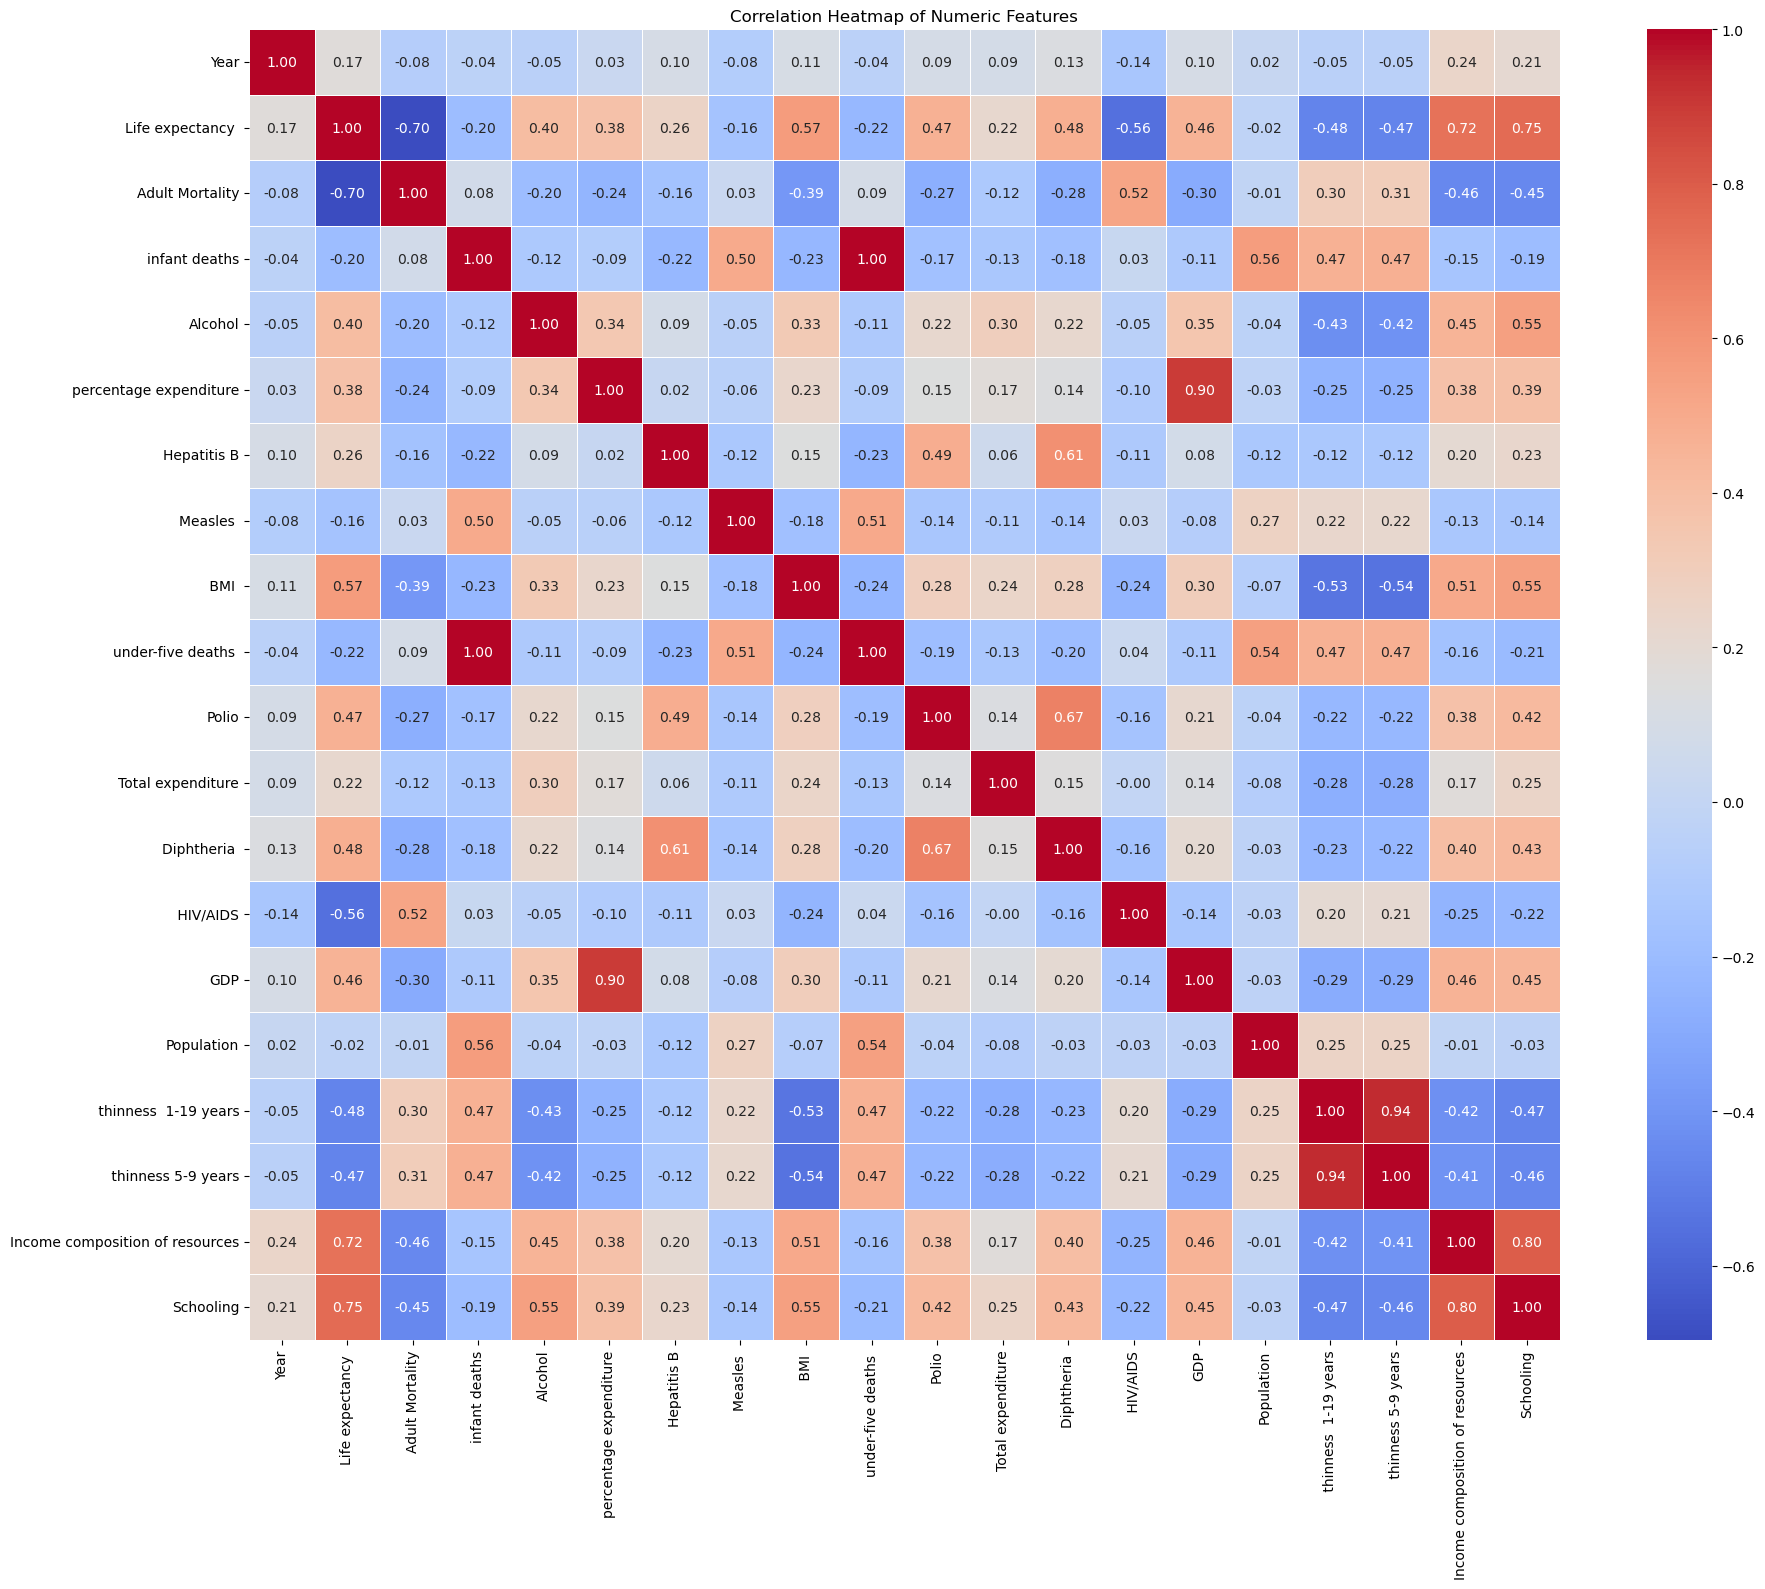

In [10]:
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()


### Data preparation

##### Handling missing values

In [6]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [37]:
dfx=df.copy()
# Drop target missing rows
dfx=dfx.dropna(subset=['Life expectancy'])


In [38]:
dfx=dfx.copy()

# Drop the population variable, which has the highest missing values and the least correction to life expectancy
dfx = dfx.drop(columns=['Population'])

# Columns with less than 10% missing values are imputed using the median.
from sklearn.impute import SimpleImputer

median_cols = ['Adult Mortality', 'BMI', 'Polio', 'Diphtheria', 'thinness  1-19 years', 'thinness 5-9 years']
imputer = SimpleImputer(strategy='median')
dfx[median_cols] = imputer.fit_transform(dfx[median_cols])


In [39]:
# The variables like Alcohol, Hepatitis B, Total expenditure, and 
# Income composition of resources is imputed group-based(by developed/Developing) using the median value.

dfx['Alcohol'] = dfx.groupby('Status')['Alcohol'].transform(lambda x: x.fillna(x.median()))
dfx['Hepatitis B'] = dfx.groupby('Status')['Hepatitis B'].transform(lambda x: x.fillna(x.median()))
dfx['Total expenditure'] = dfx.groupby('Status')['Total expenditure'].transform(lambda x: x.fillna(x.median()))
dfx['Income composition of resources'] = dfx.groupby('Status')['Income composition of resources'].transform(lambda x: x.fillna(x.median()))


##### Use a simple regression imputation for GDP and Schooling variables, which are highly correlated

##### Impute missing values for "schooling"

In [40]:
df1=dfx.copy()

from sklearn.linear_model import LinearRegression

# Predictor columns
schooling_predictors = ['Adult Mortality', 'Life expectancy', 'Income composition of resources', 'GDP']

# Impute missing values in predictors with median
imputer = SimpleImputer(strategy='median')
df1[schooling_predictors] = imputer.fit_transform(df1[schooling_predictors])

# Separate known/missing Schooling rows
df_known = df1[df1['Schooling'].notnull()]
df_missing = df1[df1['Schooling'].isnull()]

# Train Linear Regression on known rows
model_schooling = LinearRegression()
model_schooling.fit(df_known[schooling_predictors], df_known['Schooling'])

# Predict missing Schooling
pred_schooling = model_schooling.predict(df_missing[schooling_predictors])
dfx.loc[df_missing.index, 'Schooling'] = pred_schooling


##### Impute missing values for "GDP"

In [41]:
# Predictor columns
GDP_predictors = ['Adult Mortality', 'Life expectancy', 'Income composition of resources']

# Separate known/missing GDP rows
df_known_GDP = dfx[dfx['GDP'].notnull()]
df_missing_GDP = dfx[dfx['GDP'].isnull()]

# Train Linear Regression on known rows
model_GDP = LinearRegression()
model_GDP.fit(df_known_GDP[GDP_predictors], df_known_GDP['GDP'])

# Predict missing GDP
pred_GDP = model_GDP.predict(df_missing_GDP[GDP_predictors])
dfx.loc[df_missing_GDP.index, 'GDP'] = pred_GDP


##### Check the missing values again


In [43]:
dfx.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

##### Correlation with Life Expectancy

In [14]:
df.select_dtypes(include='number').corr()['Life expectancy'].sort_values(ascending=False)

Life expectancy                                   1.00
Schooling                                         0.75
Income composition of resources                   0.70
BMI                                               0.56
GDP                                               0.48
Diphtheria                                        0.47
Polio                                             0.46
Alcohol                                           0.40
percentage expenditure                            0.38
Total expenditure                                 0.22
Hepatitis B                                       0.19
Year                                              0.17
Measles                                          -0.16
infant deaths                                    -0.20
under-five deaths                                -0.22
thinness 5-9 years                               -0.46
thinness  1-19 years                             -0.47
HIV/AIDS                                         -0.56
Adult Mort

#### I am using three regression models to predict life expectancy. 
1. Linear Regression served as a baseline due to its simplicity and interpretability. 
2. Random Forest Regressor is used to capture nonlinear relationships and variable interactions. 
3. Gradient Boosting Regressor is selected for its strong predictive performance and ability to minimise residual errors through sequential learning.

##### Evaluate model performance using three key metrics:

1. R² Score – measures how well the model explains the variance in the target.
2. RMSE – Root Mean Squared Error, measures prediction accuracy.
3. MAE – Mean Absolute Error, measures average absolute prediction error.

##### Separate the independent and target variables and try basline model

In [44]:
# The 'Year', 'Country' and 'Status' columns do not have a numerical meaning, and drop them
dfx = dfx.copy()
dfx = dfx.drop(columns=['Country', 'Status', 'Year'])


In [45]:
# Separate features (X) and target (y)
X = dfx.drop(columns=['Life expectancy'])
y = dfx['Life expectancy']

# Split the data into training and testing sets.
# 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.8216765707343449
RMSE: 16.65370689752157
MAE: 3.012246789920375


##### To improve model performance and reduce noise, only features with an absolute correlation greater than 0.4 with Life expectancy are selected. This ensures the model focuses on variables with stronger linear relationships to the target variable.

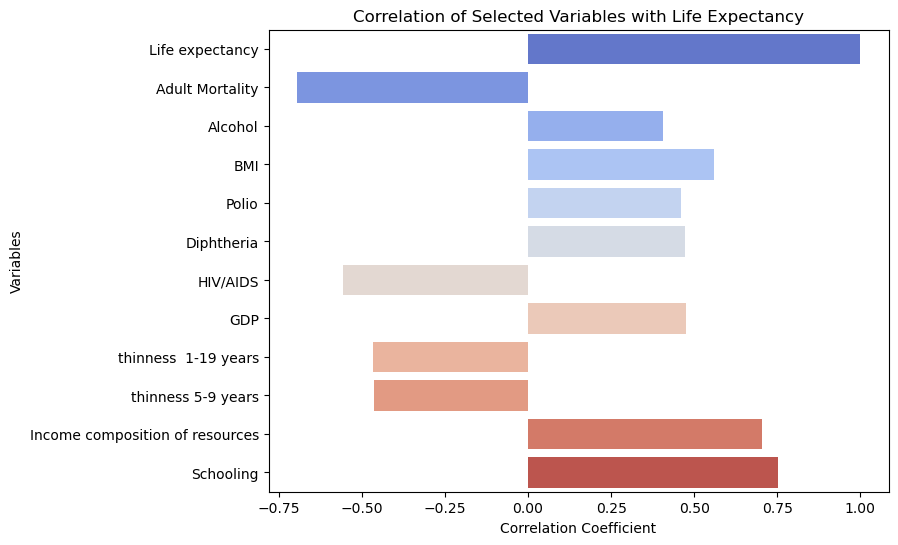

In [62]:

# Calculate correlation with target
corr_target = dfx.corr()['Life expectancy']

# Select columns with |correlation| > 0.4
selected_features = corr_target[abs(corr_target) > 0.4].index.tolist()

# Create a clean dataframe with selected features
df_selected = dfx[selected_features]

# Display selected features
#print("Selected features (|correlation| > 0.4):")
#print(df_selected.columns.tolist())

# Plot correlation of selected variables with Life Expectancy
plt.figure(figsize=(8,6))
sns.barplot(x=corr_target[selected_features].values, 
            y=selected_features, 
            hue = selected_features,
            palette='coolwarm')
plt.title('Correlation of Selected Variables with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')
plt.show()


In [52]:
df_selected.head(5)

,Life expectancy,Adult Mortality,Alcohol,BMI,Polio,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.00,263.00,0.01,19.10,6.00,65.00,0.10,584.26,17.20,17.30,0.48,10.10
1,59.90,271.00,0.01,18.60,58.00,62.00,0.10,612.70,17.50,17.50,0.48,10.00
2,59.90,268.00,0.01,18.10,62.00,64.00,0.10,631.74,17.70,17.70,0.47,9.90
3,59.50,272.00,0.01,17.60,67.00,67.00,0.10,669.96,17.90,18.00,0.46,9.80
4,59.20,275.00,0.01,17.20,68.00,68.00,0.10,63.54,18.20,18.20,0.45,9.50


In [53]:
# Separate features (X) and target (y)
X = df_selected.drop(columns=['Life expectancy'])
y = df_selected['Life expectancy']

# Split the data into training and testing sets.
# 70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))


R² Score: 0.8216765707343449
RMSE: 16.65370689752157
MAE: 3.012246789920375


##### Random Forest Regressor model and it's performance

In [59]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regressor 
rf_model = RandomForestRegressor(random_state=42, n_estimators=200, max_depth=None)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print(" **Random Forest Regressor** ")
print("R² Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))


 **Random Forest Regressor** 
R² Score: 0.9638661729688908
RMSE: 3.374554689419793
MAE: 1.1392969283276468


##### Gradient Boosting Regressor model and it's performance

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("**Gradient Boosting Regressor**")
print("R² Score:", r2_score(y_test, y_pred_gb))
print("RMSE:", mean_squared_error(y_test, y_pred_gb))
print("MAE:", mean_absolute_error(y_test, y_pred_gb))

**Gradient Boosting Regressor**
R² Score: 0.952503420346933
RMSE: 4.43572737151993
MAE: 1.4703917745989996


##### Features most influence life expectancy in Random Forest Regressor and Random Forest Regressor models

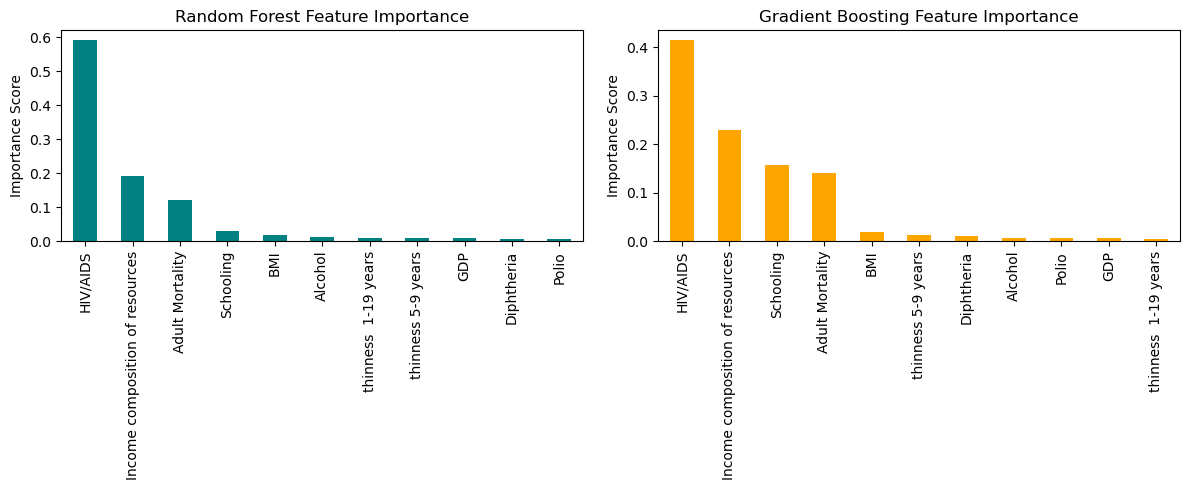

In [58]:
# Get feature importances from both models
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
gb_importance = pd.Series(gb_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Create side-by-side bar plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
rf_importance.plot(kind='bar', color='teal')
plt.title('Random Forest Feature Importance')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
gb_importance.plot(kind='bar', color='orange')
plt.title('Gradient Boosting Feature Importance')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


**Model Performance Summary**

| Model                           | R² Score |   RMSE   |    MAE   | Key Insight                                                                |
| :------------------------------ | :------: | :------: | :------: | :------------------------------------------------------------------------- |
| **Linear Regression**           |   0.82   |   4.08   |   3.01   | Struggles with non-linear patterns                                         |
| **Random Forest Regressor**     | **0.96** | **1.84** | **1.14** | Best performer — captures complex relationships, low error                 |
| **Gradient Boosting Regressor** |   0.95   |   2.11   |   1.47   | Also very strong, slightly less accurate but more interpretable and stable |


#### **Conclusion**

The Random Forest Regressor delivered the best performance, achieving an R² of 0.96, demonstrating strong predictive accuracy. The results indicate that socio-economic and health-related factors, especially schooling, income composition, and adult mortality, significantly influence life expectancy. 

While the HIV/AIDS variable showed the highest influence on life expectancy, it primarily reflects the impact of the disease within specific population groups rather than the general population. Therefore, although it is statistically significant, its influence may not represent a universal determinant of life expectancy. 

Future improvements could include hyperparameter tuning, cross-validation, and using updated datasets for enhanced generalisation and policy analysis. 
